In [ ]:
# 1. Project Title:
# Data Science Capstone Project: Manufacturing Equipment Output Prediction with Linear Regression

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv(r"/content/manufacturing_dataset_Capstone_Project_1 .csv")
df.head()

,Timestamp,Injection_Temperature,Injection_Pressure,Cycle_Time,Cooling_Time,Material_Viscosity,Ambient_Temperature,Machine_Age,Operator_Experience,Maintenance_Hours,Shift,Machine_Type,Material_Grade,Day_of_Week,Temperature_Pressure_Ratio,Total_Cycle_Time,Efficiency_Score,Machine_Utilization,Parts_Per_Hour
0,2023-01-01 00:00:00,221.0,136.0,28.7,13.6,375.5,28.0,3.8,11.2,64,Evening,Type_B,Economy,Thursday,1.625,42.3,0.063,0.510,36.5
1,2023-01-01 01:00:00,213.3,128.9,34.5,14.0,215.8,22.6,6.8,6.3,58,Night,Type_A,Standard,Wednesday,1.655,48.5,0.037,0.389,29.9
2,2023-01-01 02:00:00,222.8,115.9,19.9,9.5,307.0,25.3,4.2,9.6,47,Day,Type_A,Standard,Monday,1.922,29.4,0.061,0.551,56.9
3,2023-01-01 03:00:00,233.3,105.3,39.2,13.1,137.8,26.0,9.2,8.6,49,Evening,Type_A,Premium,Saturday,2.215,52.3,0.054,0.293,31.0
4,2023-01-01 04:00:00,212.2,125.5,45.0,9.9,298.2,23.6,6.2,23.0,49,Night,Type_B,Premium,Monday,1.691,54.9,0.145,0.443,15.0


In [ ]:
df.shape

(1000, 19)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Timestamp                   1000 non-null   object 
 1   Injection_Temperature       1000 non-null   float64
 2   Injection_Pressure          1000 non-null   float64
 3   Cycle_Time                  1000 non-null   float64
 4   Cooling_Time                1000 non-null   float64
 5   Material_Viscosity          980 non-null    float64
 6   Ambient_Temperature         980 non-null    float64
 7   Machine_Age                 1000 non-null   float64
 8   Operator_Experience         980 non-null    float64
 9   Maintenance_Hours           1000 non-null   int64  
 10  Shift                       1000 non-null   object 
 11  Machine_Type                1000 non-null   object 
 12  Material_Grade              1000 non-null   object 
 13  Day_of_Week                 1000 n

In [ ]:
df = df.drop("Timestamp", axis=1) # Remove/Process Unnecessary Columns

In [ ]:
#Handle Missing Values
df.isnull().sum()

,0
Injection_Temperature,0
Injection_Pressure,0
Cycle_Time,0
Cooling_Time,0
Material_Viscosity,20
Ambient_Temperature,20
Machine_Age,0
Operator_Experience,20
Maintenance_Hours,0
Shift,0


In [ ]:
df['Material_Viscosity'] = df['Material_Viscosity'].fillna(df['Material_Viscosity'].mean())
df['Ambient_Temperature'] = df['Ambient_Temperature'].fillna(df['Ambient_Temperature'].mean())
df['Operator_Experience'] = df['Operator_Experience'].fillna(df['Operator_Experience'].mean())

In [ ]:
df.isnull().sum()

,0
Injection_Temperature,0
Injection_Pressure,0
Cycle_Time,0
Cooling_Time,0
Material_Viscosity,0
Ambient_Temperature,0
Machine_Age,0
Operator_Experience,0
Maintenance_Hours,0
Shift,0


In [ ]:
#Encode Categorical Variables
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

In [ ]:
df.head()

,Injection_Temperature,Injection_Pressure,Cycle_Time,Cooling_Time,Material_Viscosity,Ambient_Temperature,Machine_Age,Operator_Experience,Maintenance_Hours,Shift,Machine_Type,Material_Grade,Day_of_Week,Temperature_Pressure_Ratio,Total_Cycle_Time,Efficiency_Score,Machine_Utilization,Parts_Per_Hour
0,221.0,136.0,28.7,13.6,375.5,28.0,3.8,11.2,64,1,1,0,4,1.625,42.3,0.063,0.510,36.5
1,213.3,128.9,34.5,14.0,215.8,22.6,6.8,6.3,58,2,0,2,6,1.655,48.5,0.037,0.389,29.9
2,222.8,115.9,19.9,9.5,307.0,25.3,4.2,9.6,47,0,0,2,1,1.922,29.4,0.061,0.551,56.9
3,233.3,105.3,39.2,13.1,137.8,26.0,9.2,8.6,49,1,0,1,2,2.215,52.3,0.054,0.293,31.0
4,212.2,125.5,45.0,9.9,298.2,23.6,6.2,23.0,49,2,1,1,1,1.691,54.9,0.145,0.443,15.0


In [ ]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[col] = scaler.fit_transform(df[[col]])

In [ ]:
# Define Target Variable
X = df.drop('Parts_Per_Hour', axis=1)
y = df['Parts_Per_Hour']

In [ ]:
# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Evaluation Criteria
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)

Mean Squared Error (MSE): 13.715878490712717
Root Mean Squared Error (RMSE): 3.7034954422427355
R² Score: 0.8948917238224946


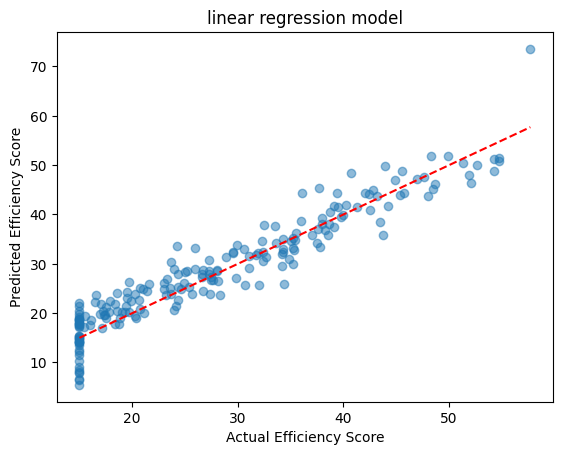

In [ ]:
#data visualization
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Efficiency Score')
plt.ylabel('Predicted Efficiency Score')
plt.title("linear regression model")
plt.show()

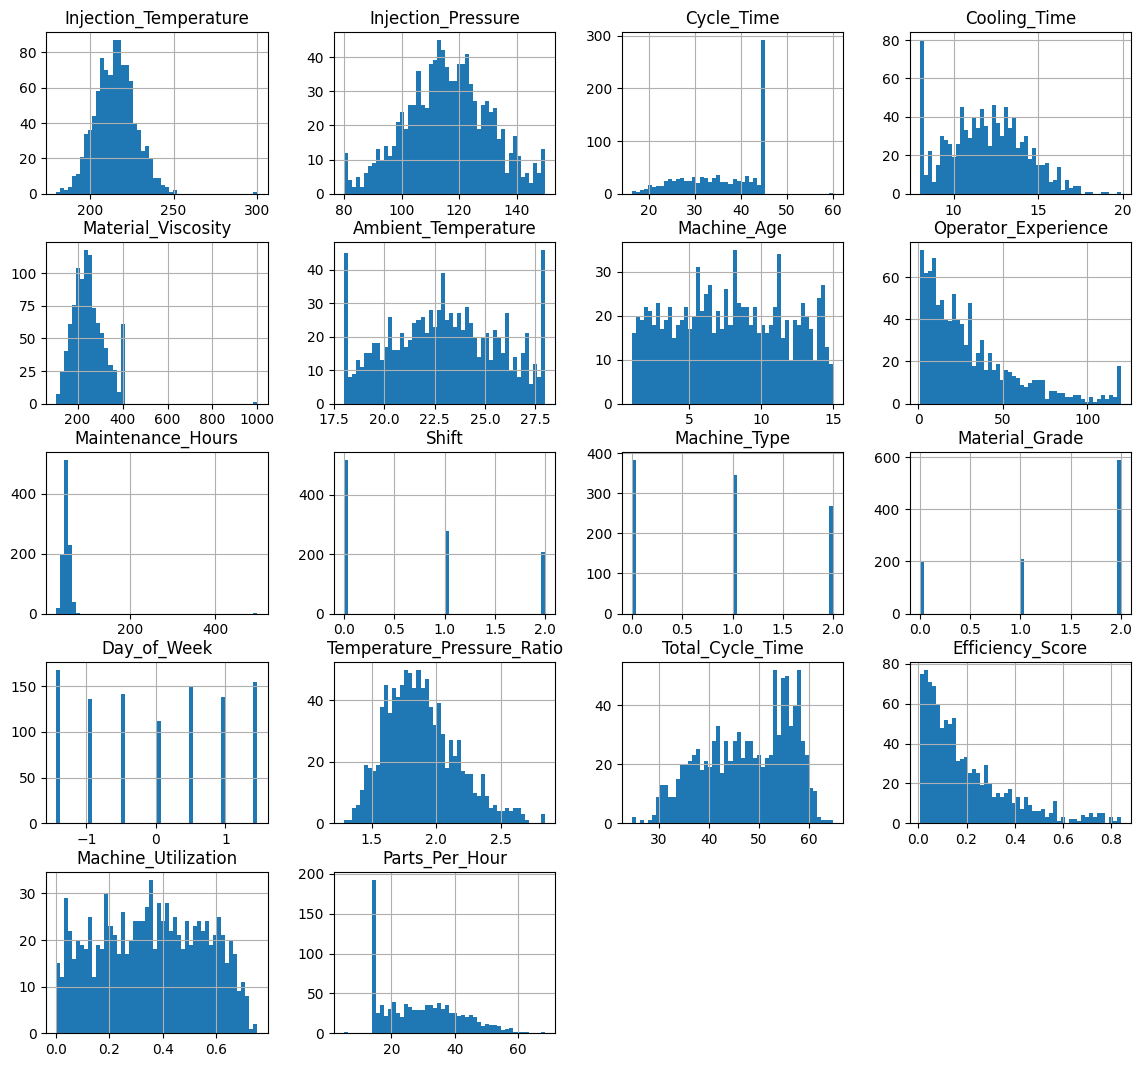

In [ ]:
df[['Injection_Temperature','Injection_Pressure','Cycle_Time','Cooling_Time','Material_Viscosity',
    'Ambient_Temperature','Machine_Age','Operator_Experience','Maintenance_Hours','Shift','Machine_Type',
    'Material_Grade','Day_of_Week','Temperature_Pressure_Ratio','Total_Cycle_Time',
    'Efficiency_Score','Machine_Utilization','Parts_Per_Hour']].hist(bins=50, figsize=(14,13))
plt.show()

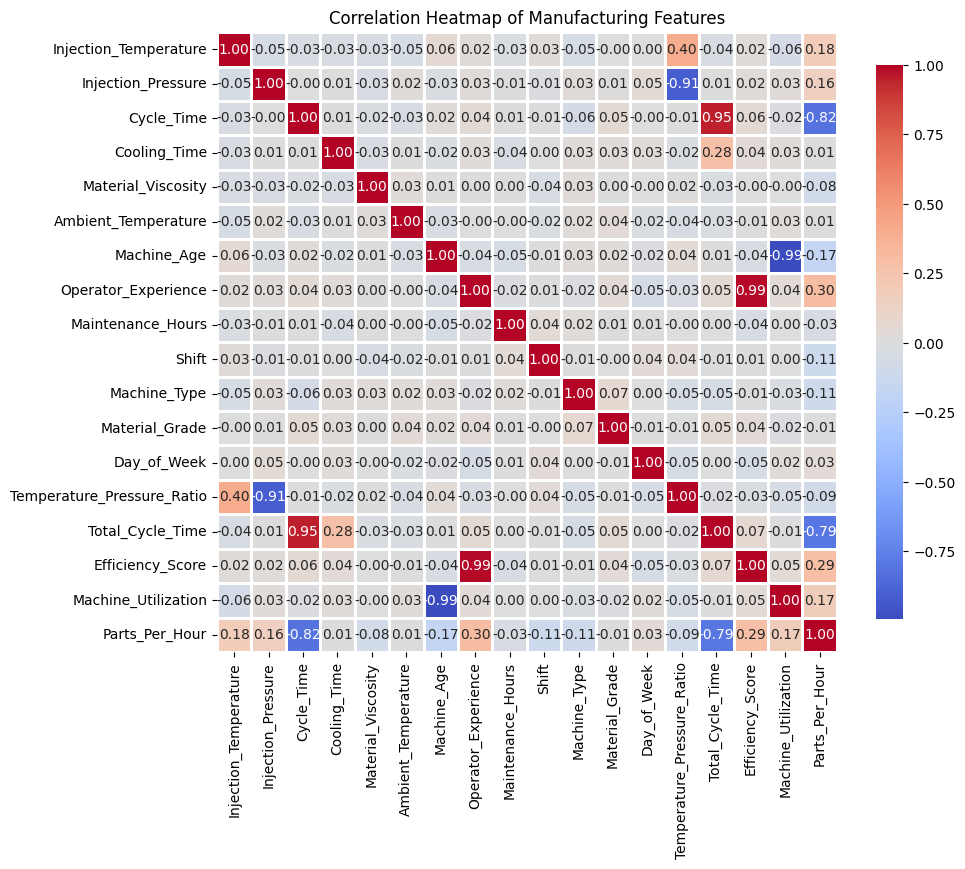

In [ ]:
import seaborn as sns

plt.figure(figsize=(10,9))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap of Manufacturing Features')
plt.show()

In [ ]:
import pickle
import json
# Step 9: Model saving
with open('linear_regression_model.pkl', 'wb') as f:
    pickle.dump(model, f)

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

with open('feature_columns.json', "w") as f:
    json.dump(X.columns.tolist(), f)

print("Model, scaler, and feature columns saved.")

Model, scaler, and feature columns saved.
